In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
raw_eeg_data = pd.read_csv('../data/features_raw.csv')
raw_eeg_data.head()

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


In [11]:
print(list(raw_eeg_data.columns))

['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2', 'Unnamed: 32']


![EEG electrodes in the brain](eeg-electrodes.png)

Each feature in the raw EEG data corresponds to the voltage measured at a specific electrode put in a certain region in the brain. The electrodes are placed on the scalp according to the 10-20 system.

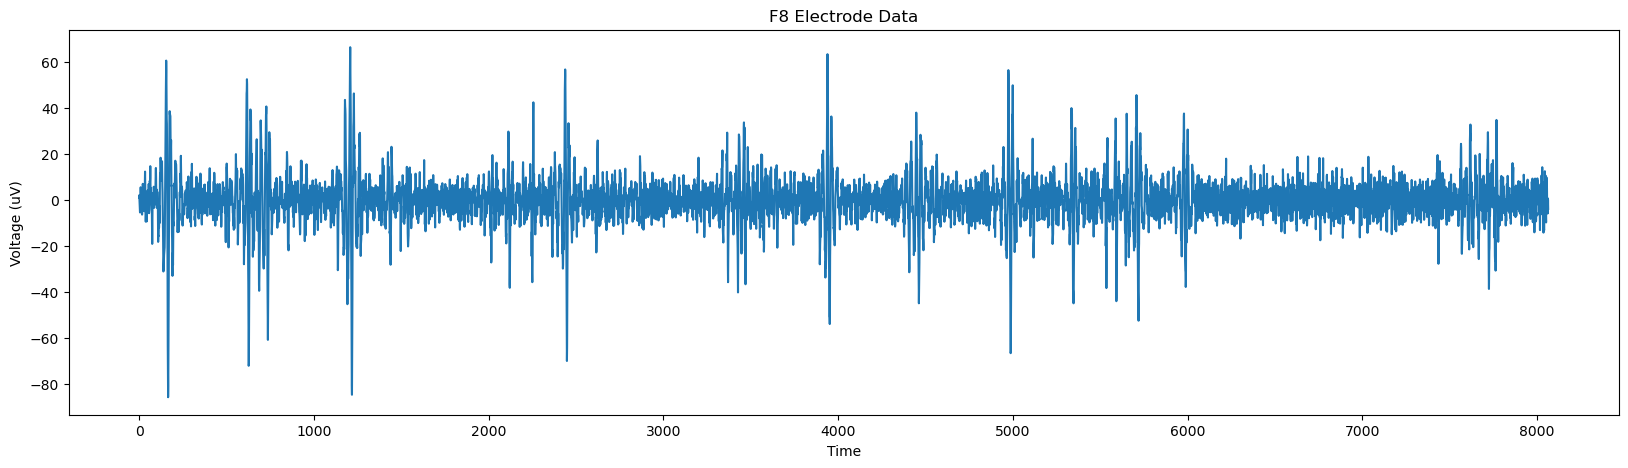

In [12]:
# plot the F8 column
plt.figure(figsize=(20, 5))
plt.plot(raw_eeg_data['F8'])
plt.title('F8 Electrode Data')
plt.ylabel('Voltage (uV)')
plt.xlabel('Time')
plt.show()

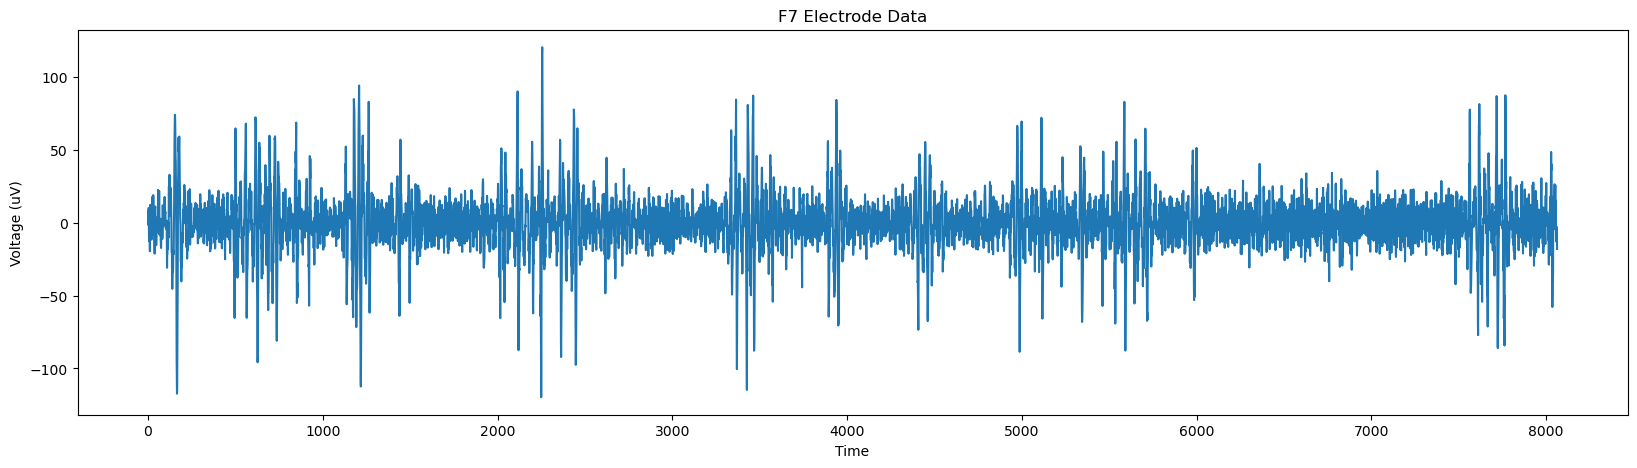

In [13]:
# plot the F7 column
plt.figure(figsize=(20, 5))
plt.plot(raw_eeg_data['F7'])
plt.title('F7 Electrode Data')
plt.ylabel('Voltage (uV)')
plt.xlabel('Time')
plt.show()

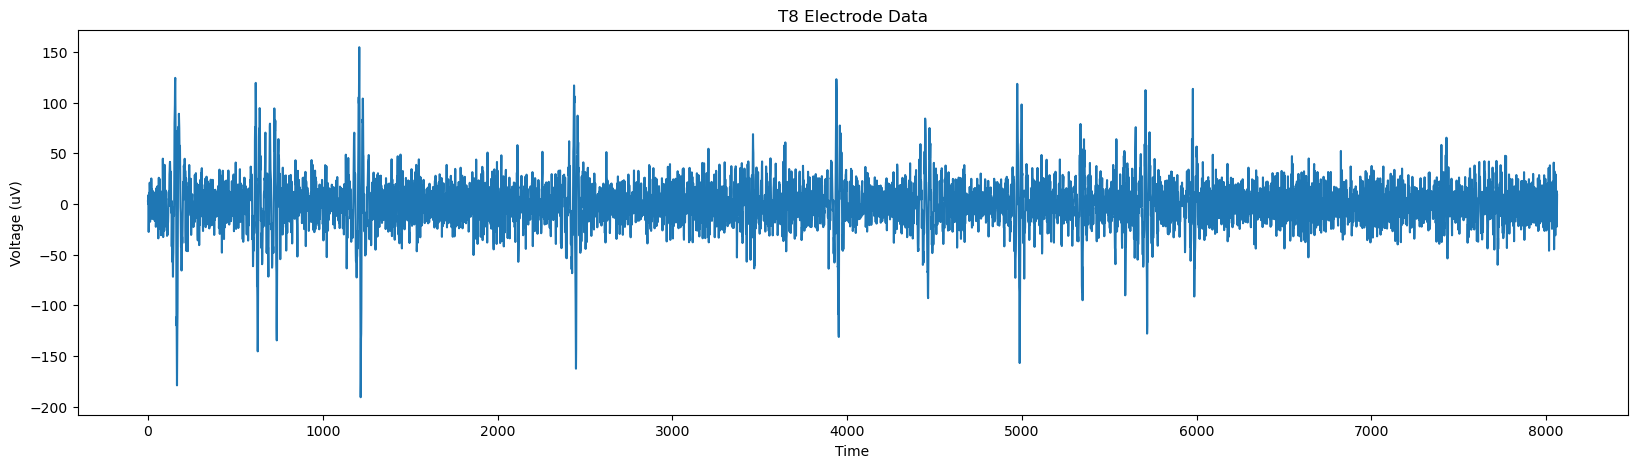

In [14]:
# plot the T8 column
plt.figure(figsize=(20, 5))
plt.plot(raw_eeg_data['T8'])
plt.title('T8 Electrode Data')
plt.ylabel('Voltage (uV)')
plt.xlabel('Time')
plt.show()

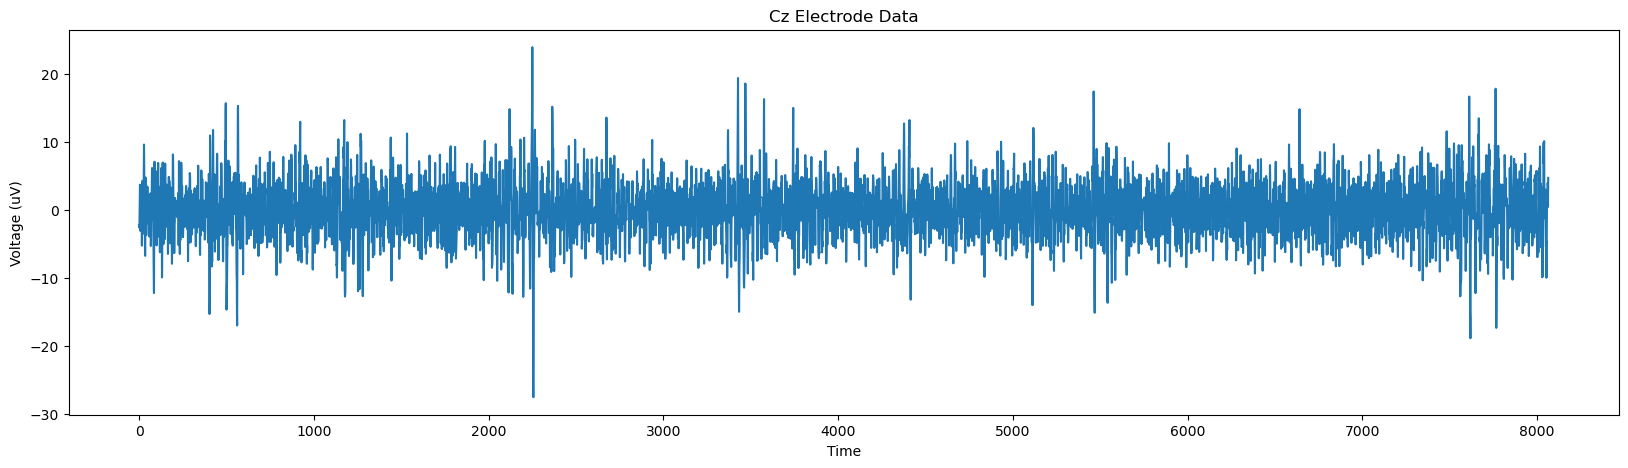

In [15]:
# plot the Cz column
plt.figure(figsize=(20, 5))
plt.plot(raw_eeg_data['Cz'])
plt.title('Cz Electrode Data')
plt.ylabel('Voltage (uV)')
plt.xlabel('Time')
plt.show()

The recorded raw data from EEG was preprocessed and converted into a new dataset containing features and emotion labels. 

"To generate a dataset of statistical features, an effective methodology from a previous study was used to extract 2400 features through a sliding window of 1 second beginning at t=0 and t=0.5.

The study employs four dry extra-cranial electrodes via a commercially available MUSE EEG headband. Microvoltage measurements are recorded from the TP9, AF7, AF8, and TP10 electrodes. Sixty seconds of data were recorded from two subjects (1 male, 1 female, aged 20-22) for each of the 6 film clips producing 12 minutes (720 seconds) of brain activity data (6 minutes for each emotional state). Six minutes of neutral brainwave data were also collected resulting in a grand total of 36 minutes of EEG data recorded from subjects. With a variable frequency resampled to 150Hz, this resulted in a dataset of 324,000 data points collected from the waves produced by the brain"

In [16]:
eeg_emotions_data = pd.read_csv('../data/emotions.csv')
eeg_emotions_data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


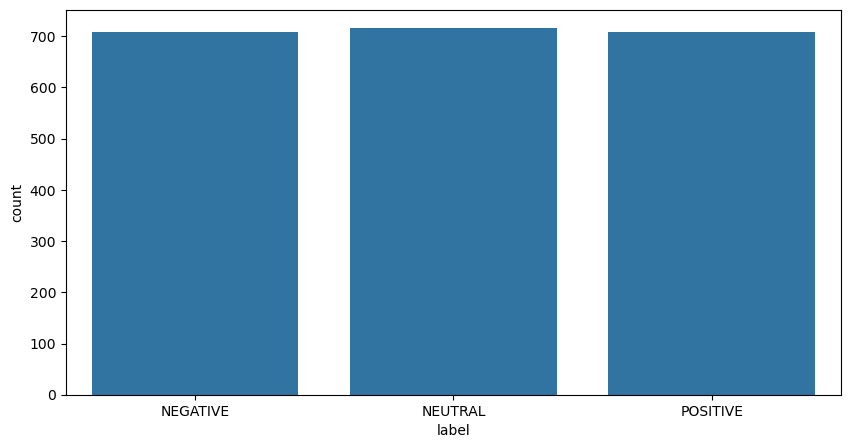

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


In [17]:
# plot lables from eeg data and their counts
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=eeg_emotions_data)
plt.show()

print(eeg_emotions_data['label'].value_counts())

We have three classes representing the emotions of the participants, Positive (Happy), Neutural, and Negative (Sad). The counts of the classes are almost equal, so we don't have to worry about class imbalance.

## Data Preprocessing

In [18]:
X = eeg_emotions_data.drop(['label'], axis=1)
y = eeg_emotions_data['label']

In [19]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_emotions = LabelEncoder()
y = labelencoder_emotions.fit_transform(y)

In [20]:
# Standardizing the features in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [21]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2003)

## Creating the Model

Trying first with a linear model, then SVM, then random forest, then a neural network.

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(y_test, y_pred):
    # Confusion matrix
    conf = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf, index = [i for i in ["Happy", "Neutral", "Sad"]],
                        columns = [i for i in ["Happy", "Neutral", "Sad"]])
    plt.figure(figsize = (8,5))
    s = sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')
    s.set(xlabel='Predicted label', ylabel='True label', title="Confusion matrix")
    # add margin between xlabel and ticks
    s.xaxis.labelpad = 20
    s.yaxis.labelpad = 20

    # Classification report
    # print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)

    report_plot = pd.DataFrame(report).transpose()
    report_plot = report_plot.iloc[:3, :3]
    
    # # Plotting
    plt.figure(figsize=(8, 5))
    sns.heatmap(report_plot, annot=True, fmt=".2f", cmap='Blues', yticklabels=['happy','neutral','sad'])
    plt.title('Classification Report')
    plt.ylabel('Classes')
    plt.xlabel('Metrics')
    plt.show()

LogisticRegression Model

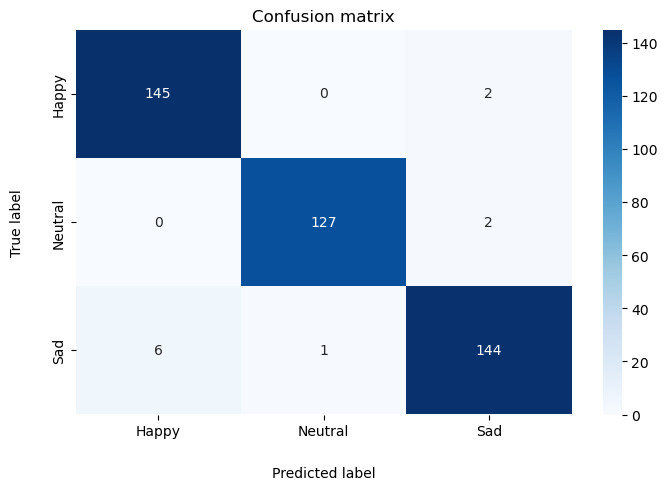

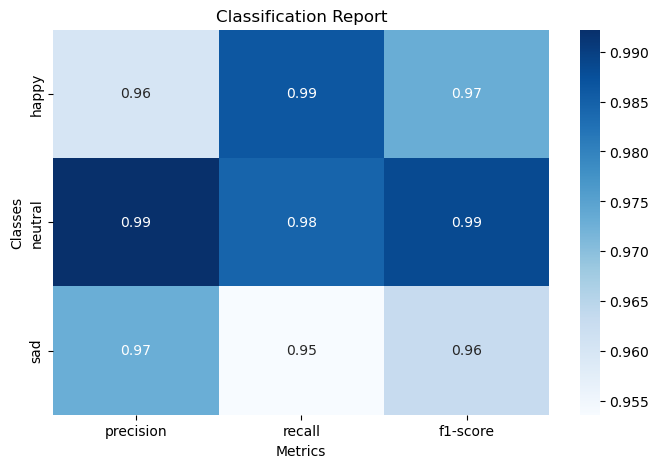

In [23]:
from sklearn.linear_model import LogisticRegression
import pickle

# Create a logistic regression classifier
model = LogisticRegression(random_state=2003, multi_class='multinomial', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
evaluate_model(y_test, model.predict(X_test))

# Save the model
pickle.dump(model, open('../models/linear-model.pkl','wb'))

Support Vector Machine (SVM)

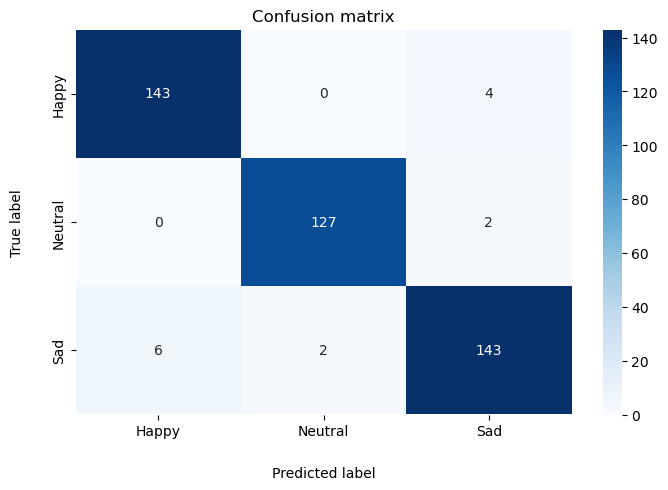

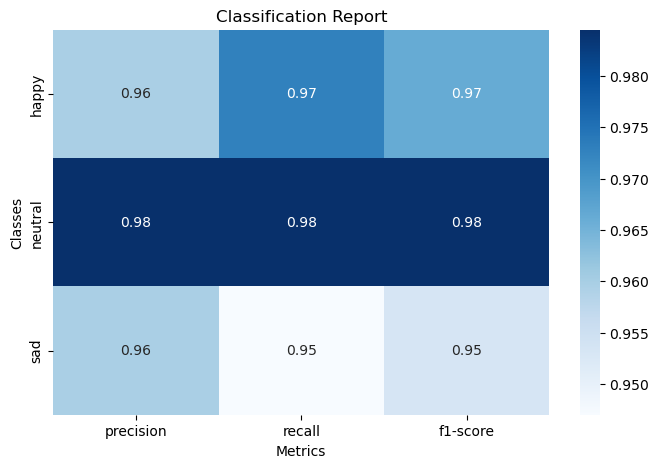

In [24]:
from sklearn.svm import SVC

# Create a model: a support vector classifier
model = SVC(kernel='rbf', gamma='auto', C=1.0, random_state=2003)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
evaluate_model(y_test, model.predict(X_test))

# Save the model
pickle.dump(model, open('../models/svm-model.pkl','wb'))

Random Forest Classifier

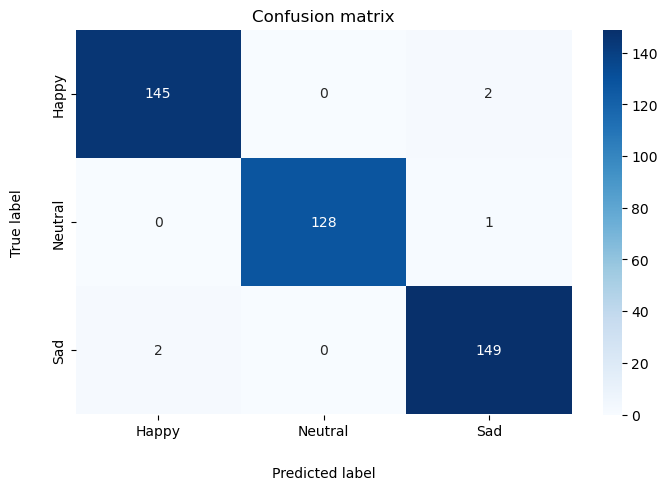

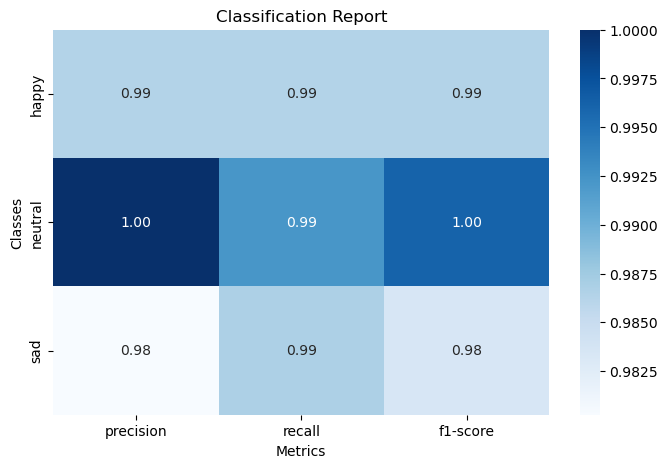

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier.
model = RandomForestClassifier(n_estimators=100, random_state=2003)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
evaluate_model(y_test, model.predict(X_test))

# Save the model
pickle.dump(model, open('../models/randomforest-model.pkl','wb'))

From the Evaluations, Random forest is clearly the best performing model.

## Creating a Multi Layer Perceptron Neural Network (MLP) for EEG using PyTorch

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import torch.nn.functional as F

In [27]:
X_train.shape

(1705, 2548)

In [28]:
class EEGClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256):
        super(EEGClassifier, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [29]:
input_dim = 2548  # Number of features in EEG signal
num_classes = 3   # Number of classes for classification
model = EEGClassifier(input_dim, num_classes)
loss = nn.CrossEntropyLoss()

In [30]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [31]:
for epoch in range(10):
    running_loss = 0.0

    batch_size = 32
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]
        
        inputs = torch.from_numpy(inputs).float()
        labels = torch.from_numpy(labels).long()
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimizer.step()
        
        running_loss += loss_value.item()

    print('[%d] loss: %.10f' % (epoch + 1, running_loss / len(X_train)))

[1] loss: 0.1004005051
[2] loss: 0.0221161037
[3] loss: 0.0377358695
[4] loss: 0.0298479822
[5] loss: 0.0220648768
[6] loss: 0.0223255902
[7] loss: 0.0173511741
[8] loss: 0.0543800369
[9] loss: 0.0196894691
[10] loss: 0.0053897772


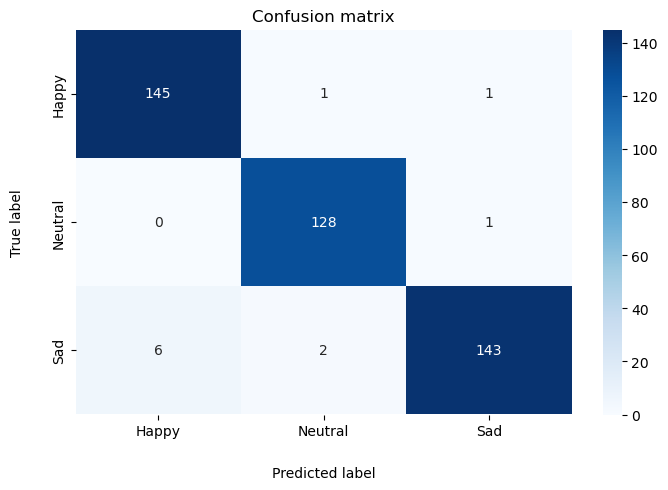

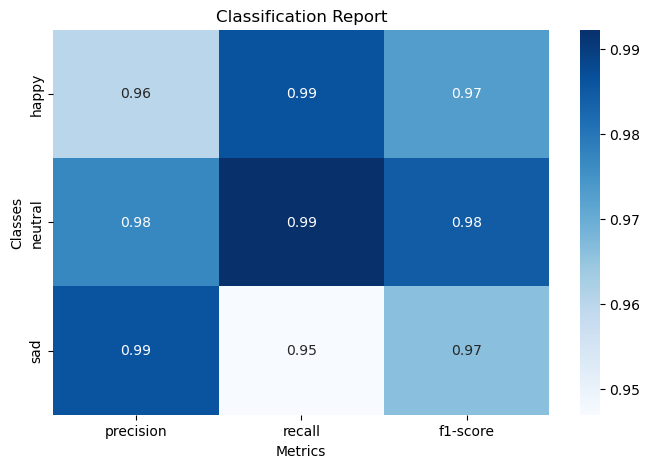

In [32]:
# Evaluating the model
y_pred = model(torch.from_numpy(X_test).float()).detach().numpy().argmax(axis=1)
evaluate_model(y_test, y_pred)

# Saving model
torch.save(model.state_dict(), '../models/MLP.pth')

## Creating Conformer (CNN + Transformer) model for EEG classification.

Based on Song et al. (2023) IEEE paper.

![Architecture of the EEG Conformer Model](EEG-Conformer-Architecture.png)

In [33]:
class EEGConformer(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(EEGConformer, self).__init__()

        # CNN
        self.conv1 = nn.Conv2d(1, 40, kernel_size=(1, 25), stride=(1, 1))
        self.conv2 = nn.Conv2d(40, 40, kernel_size=(1, input_dim), stride=(1, 1))
        self.batchnorm = nn.BatchNorm2d(40)

        # Transformer
        self.layernorm1 = nn.LayerNorm(40)
        self.multiheadattention = nn.MultiheadAttention(40, 1)
        self.layernorm2 = nn.LayerNorm(40)

        self.feedworward_block = nn.Sequential(
            nn.Linear(40, 32),
            nn.GELU(),
            nn.Dropout(p=0.1),
            nn.Linear(32, 40)
        )

        # MLP
        self.fc1 = nn.Linear(40, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        # CNN
        x = x.unsqueeze(1).unsqueeze(1)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.batchnorm(x)

        # Transformer
        x = x.squeeze()
        x = self.layernorm1(x)
        attn_out = self.multiheadattention(x, x, x)
        x = x + nn.Dropout(0.1)(attn_out[0])
        x = self.layernorm2(x)
        x = self.feedworward_block(x)
        x = nn.Dropout(p=0.1)(x)

        # MLP
        x = self.fc1(x)
        x = F.elu(x)
        x = nn.Dropout(p=0.5)(x)
        x = self.fc2(x)
        x = F.elu(x)
        x = nn.Dropout(p=0.3)(x)
        x = self.fc3(x)
        
        return x

In [34]:
input_dim = 2524  # Number of features in EEG signal
num_classes = 3   # Number of classes for classification
model = EEGConformer(input_dim, num_classes)
loss = nn.CrossEntropyLoss()

In [35]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [38]:
for epoch in range(100):
    running_loss = 0.0

    batch_size = 32
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]
        
        inputs = torch.from_numpy(inputs).float()
        labels = torch.from_numpy(labels).long()
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimizer.step()
        
        running_loss += loss_value.item()

    print('[%d] loss: %.10f' % (epoch + 1, running_loss / len(X_train)))

[1] loss: 0.0000474777
[2] loss: 0.0004114738
[3] loss: 0.0000929088
[4] loss: 0.0002129501
[5] loss: 0.0000859268
[6] loss: 0.0001078887
[7] loss: 0.0000644768
[8] loss: 0.0000490856
[9] loss: 0.0000267897
[10] loss: 0.0000247161
[11] loss: 0.0000220866
[12] loss: 0.0000287127
[13] loss: 0.0000269541
[14] loss: 0.0000115375
[15] loss: 0.0000150515
[16] loss: 0.0000428164
[17] loss: 0.0000168991
[18] loss: 0.0001757023
[19] loss: 0.0010750326
[20] loss: 0.0002646018
[21] loss: 0.0002733514
[22] loss: 0.0000537487
[23] loss: 0.0000314427
[24] loss: 0.0000250884
[25] loss: 0.0000255575
[26] loss: 0.0000747570
[27] loss: 0.0000347218
[28] loss: 0.0000217363
[29] loss: 0.0000165585
[30] loss: 0.0000215593
[31] loss: 0.0000135458
[32] loss: 0.0000126942
[33] loss: 0.0000223429
[34] loss: 0.0000116061
[35] loss: 0.0000134314
[36] loss: 0.0000097924
[37] loss: 0.0000099701
[38] loss: 0.0000094851
[39] loss: 0.0000077314
[40] loss: 0.0000133726
[41] loss: 0.0003764090
[42] loss: 0.0007621978
[

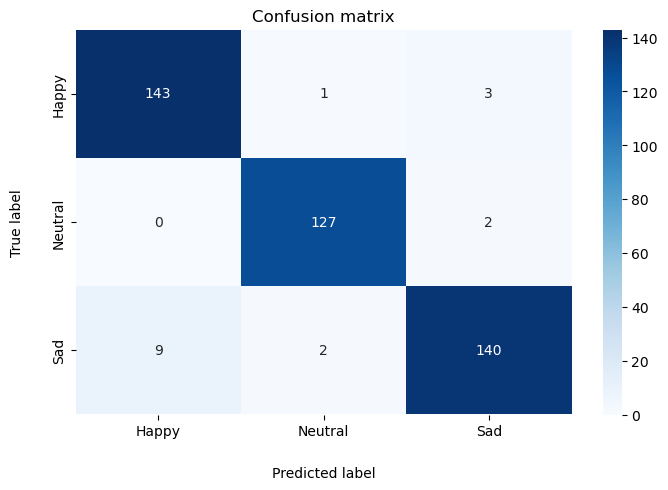

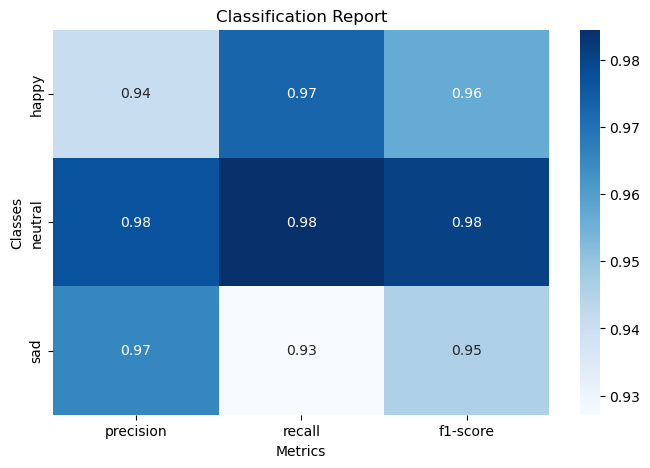

In [39]:
# Evaluating the model
y_pred = model(torch.from_numpy(X_test).float()).detach().numpy().argmax(axis=1)
evaluate_model(y_test, y_pred)

# Saving model
torch.save(model.state_dict(), '../models/Conformer_EEG.pth')

## Mission Done!🎉 